# Exploring Vaccination Strategies
#### Author: [Erika Fille Legara](https://erikalegara.site)


[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://github.com/eflegara/Network-Science-Lectures/blob/master/LICENSE.md) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eflegara/Network-Science-Lectures/blob/master/notebooks/08_social_distancing.ipynb)

For context, this notebook is accompanied by a lecture session under the Network Science course under [AIM's MSc in Data Science program](https://aim.edu/programs/degree-programs/master-science-data-science).

---

Here, we want to explore how different vaccination strategies work in a given complex network. Essentially, when we _vaccinate_ someone in the context of this _in-silico_ experiment, we are _removing_ that someone (a node) from the network. The network can be thought of as a contact network wherein connected nodes can infect each other, practically spreading the virus. 

We explore three strategies:

    - Strategy I: Randomized Vaccination
    - Strategy II: Vaccinate Highly Connected Individuals
    - Strategy III: Randomized Vaccination: Randomly Choosing an Individual and Vaccinating a Random Neighbor
    
We will be using the Barabasi-Albert model to illustrate how structure affects network dynamics. 

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Below, we define our parameters. $N$ is just the number of agents in the network, while $r$ is the percentage of the population that will be vaccinated.

In [21]:
N = 300
r = .4
G = nx.barabasi_albert_graph(N,3)

For ease of plotting later, we write the `viewnet()` function.

In [34]:
def view_network(GG):
    colors = ['grey', '#051557', '#AE2B1F']
    GC_nodes = max(nx.connected_components(GG), key=len)
    GC = GG.subgraph(GC_nodes).copy()

    for n in GG.nodes():
        if n in list(GC_nodes):
            GG.nodes()[n]['col'] = 2
        else:
            GG.nodes()[n]['col'] = GG.nodes()[n]['vac']

    plt.figure(figsize=(15,15 ))
    pos = nx.spring_layout(GG)
    nx.draw_networkx_nodes(GG, pos=pos, nodelist=GG.nodes(), 
                           node_color=[colors[v] for v in list(nx.get_node_attributes(GG, 'col').values())],
                           node_size=[(v) * 25 + 30 for v in dict(GG.degree()).values()])
    nx.draw_networkx_edges(GG, pos=pos)
    plt.axis('off')
    plt.show()
    return

### Randomly vaccinate $r\%$ of population.

In [35]:
G1 = G.copy()

In [36]:
vaccinate_them = np.random.choice(list(G1.nodes()), int(r*N), replace=False)  

In [37]:
for i in G1.nodes():
    if i in vaccinate_them:
        G1.nodes()[i]['vac'] = 1
    else:
        G1.nodes()[i]['vac'] = 0

In [38]:
G1.remove_edges_from(list(G1.edges(vaccinate_them)))

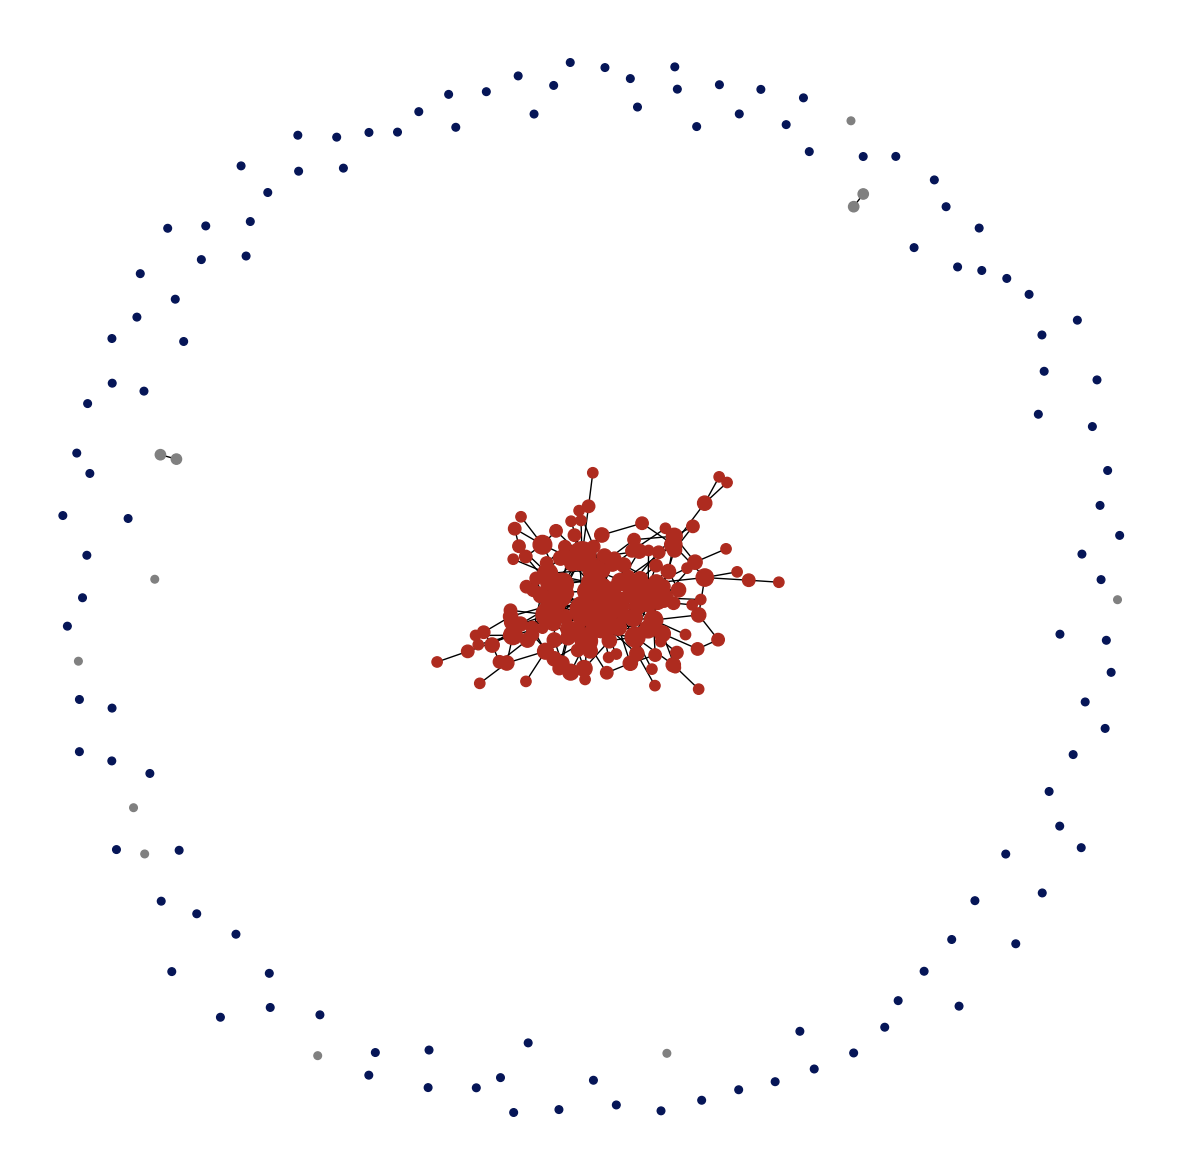

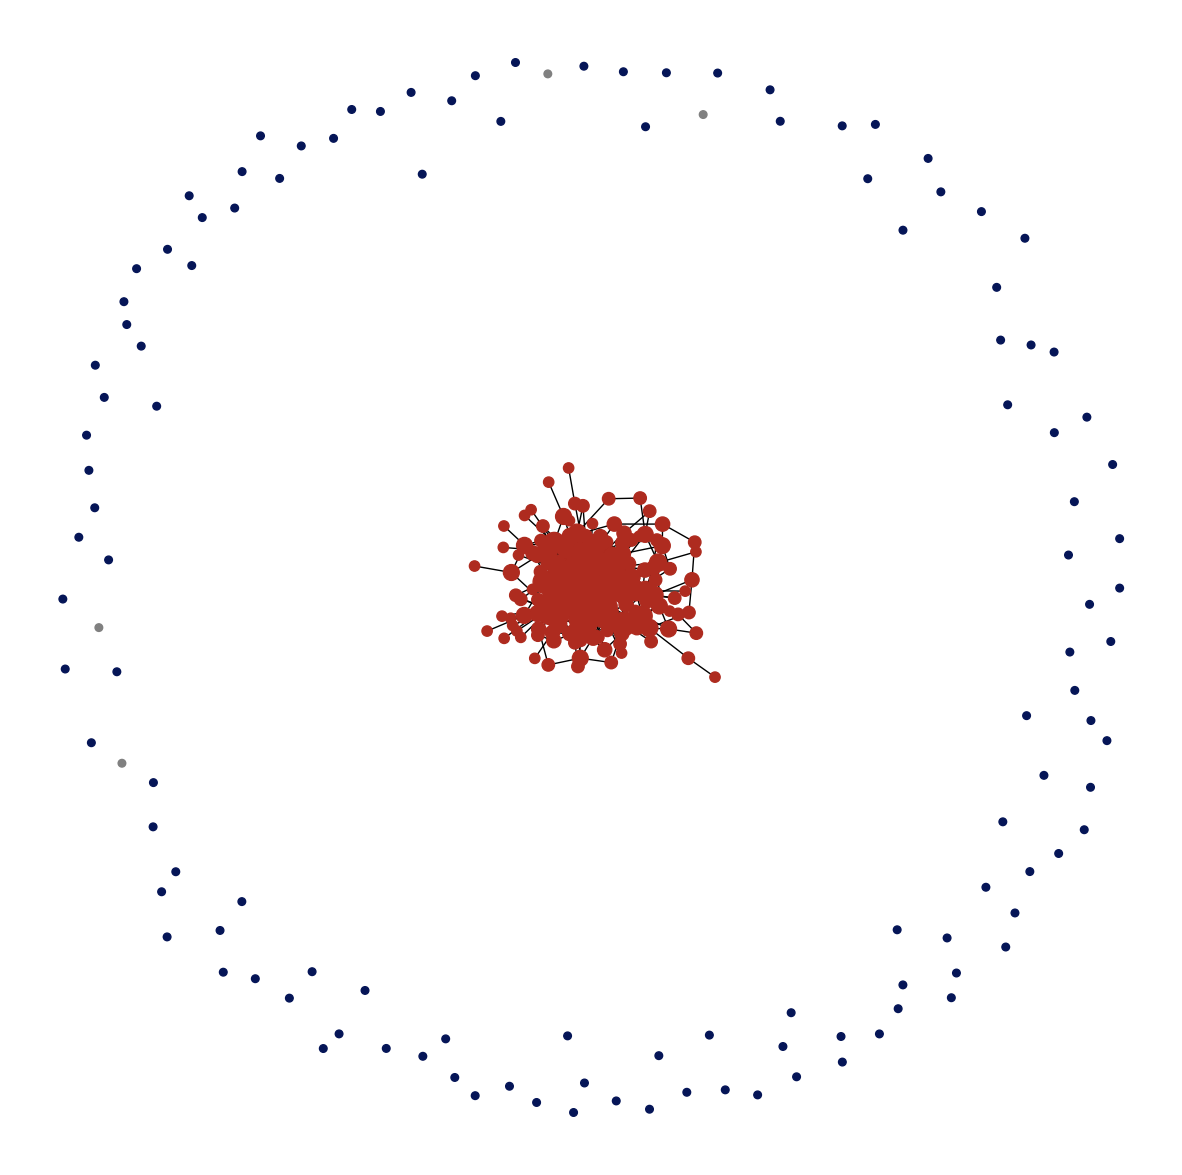

In [39]:
view_network(G1)

### Vaccinate top $r\%$ of population in terms of connection.

In [40]:
G2 = G.copy()

In [41]:
top_n = int(r*N)

In [42]:
by_degree = sorted(G2.degree, key=lambda x: x[1], reverse=True)
vaccinate_them = [n for n, e in by_degree[:top_n]]

In [43]:
for i in G2.nodes():
    if i in vaccinate_them:
        G2.nodes()[i]['vac'] = 1
    else:
        G2.nodes()[i]['vac'] = 0

In [44]:
G2.remove_edges_from(list(G2.edges(vaccinate_them)))

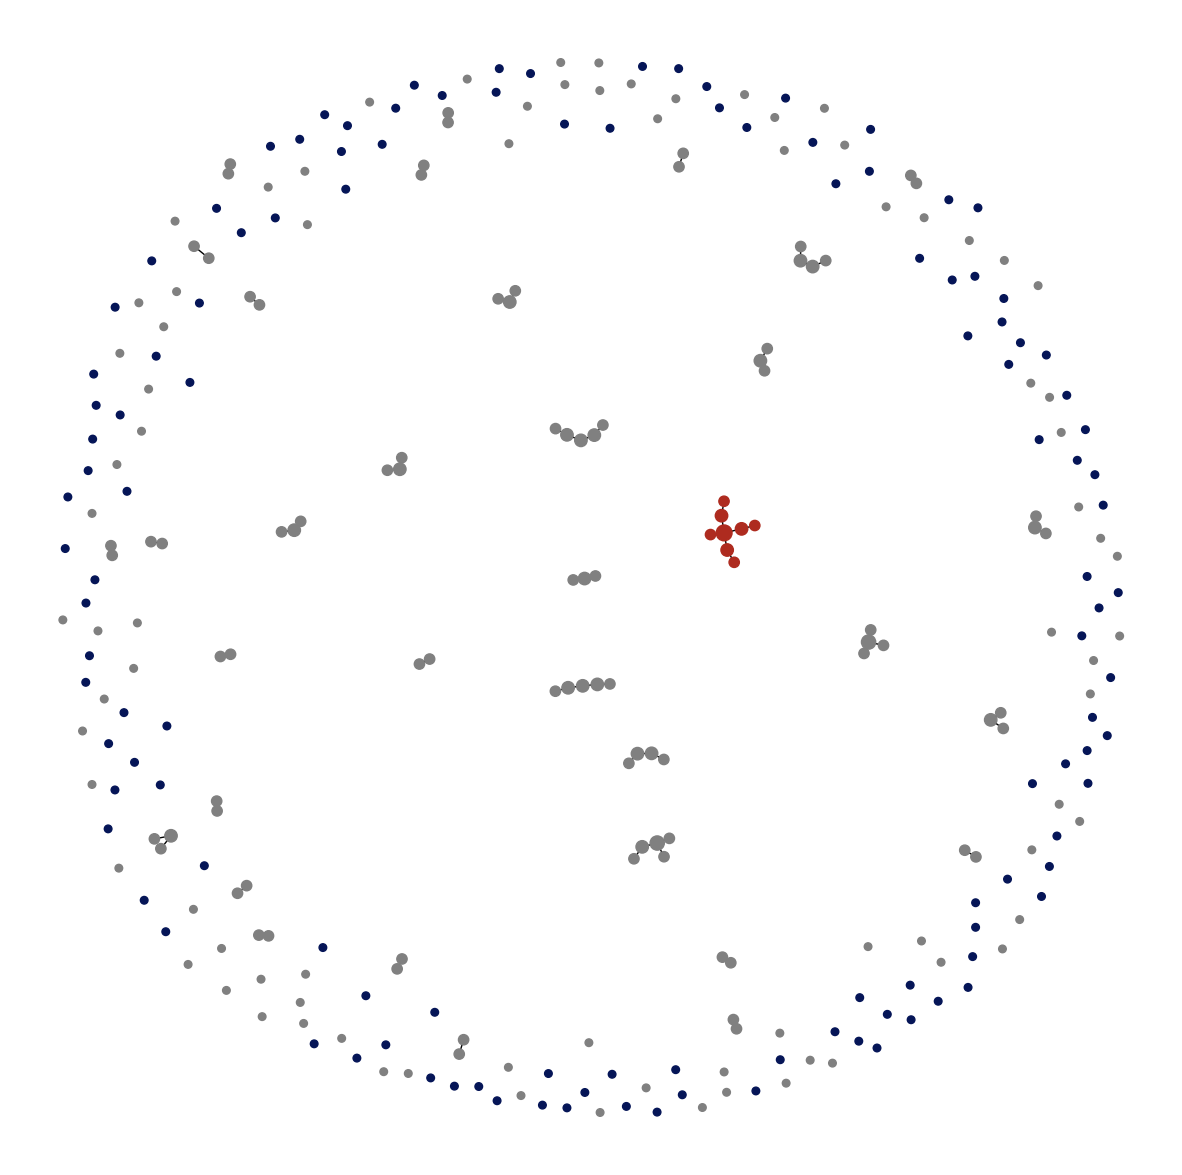

In [45]:
view_network(G2)

### Vaccinate a neighbor of randomly picked nodes - $r\%$ of the population.

In [46]:
G3 = G.copy()

In [47]:
for n in G3.nodes():
    G3.nodes()[n]['vac'] = 0

In [48]:
random_individuals = np.random.choice(list(G3.nodes()), int(r*N), replace=False)  
vaccinated_friend = []
for i in random_individuals:
    neighbors = list(G3.neighbors(i))
    unvac_neighbors = [n for n in neighbors if G3.nodes()[n]['vac'] == 0]
    if unvac_neighbors:
        picked = np.random.choice(unvac_neighbors, 1)[0]
        G3.nodes()[picked]['vac'] = 1
        vaccinated_friend.append(picked)

    # if all friends are vaccinated, vaccinate self
    elif G3.nodes()[i]['vac'] == 0:
        G3.nodes()[i]['vac'] = 1
        vaccinated_friend.append(i)

In [49]:
G3.remove_edges_from(list(G3.edges(vaccinated_friend)))

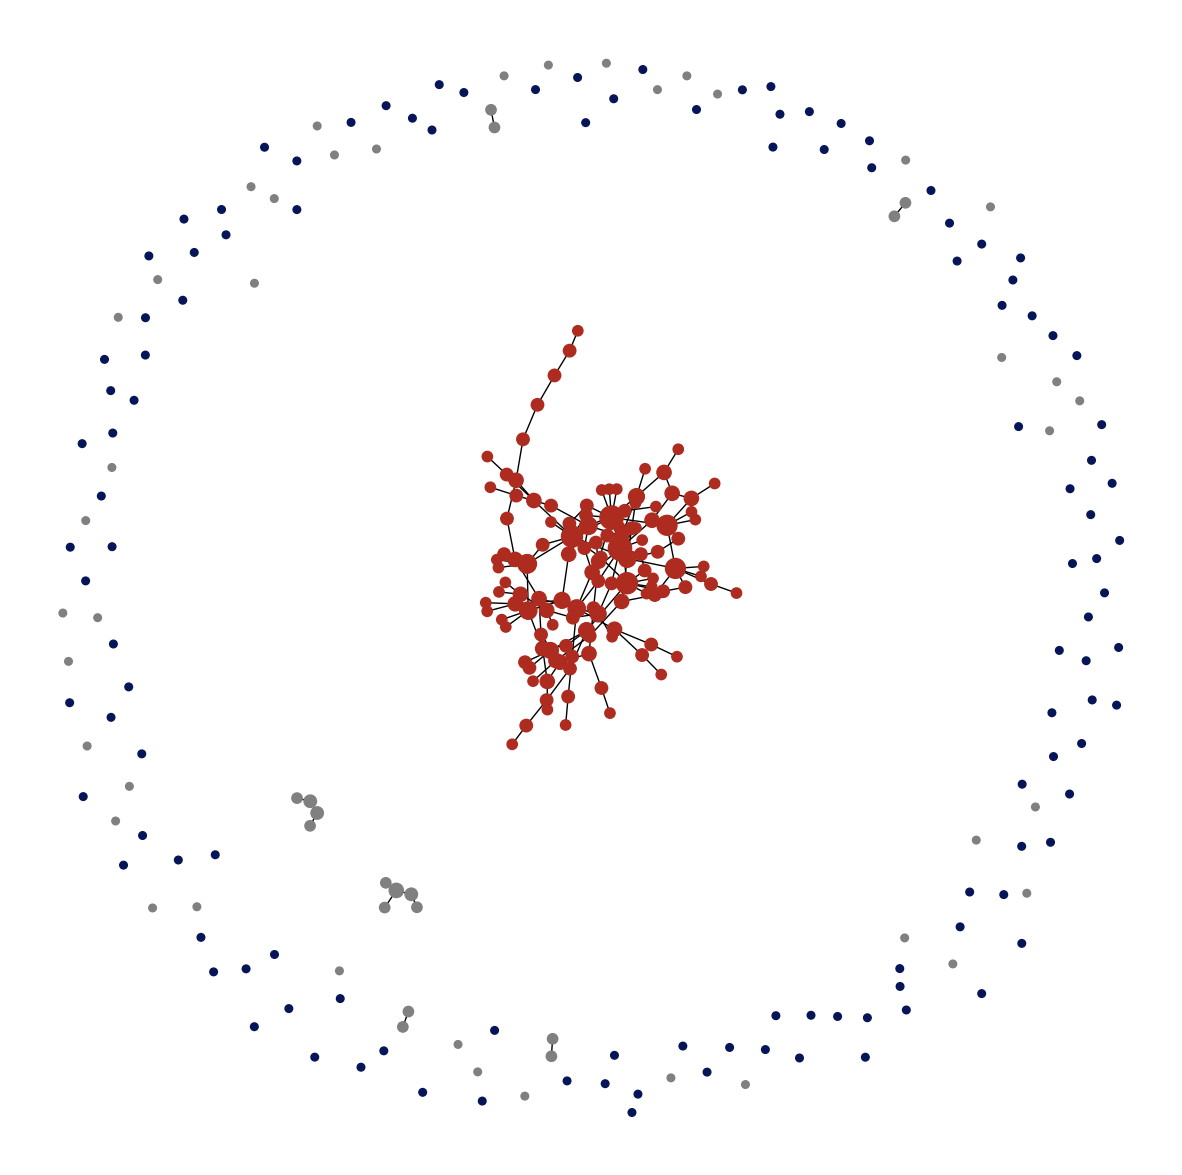

In [50]:
view_network(G3)

## Let's Discuss.

- What's going on here? Can you explain the outcomes? In Strategies 1 and 3, we are both picking individuals to be vaccinated at random. How come we're observing different results? 

- What do you think is the effect of the network structure (model)? If yes, which particular feature or features of networks do you think influence(s) the outcomes observed here? 

- What do you think will happen if used the Watts-Strogatz model? How about an ER model? 